In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Review: Census ##

The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The SEX column contains numeric codes: 1 for male, 2 for female, and 0 for the total.


In [2]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A description of the table appears online.
# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [3]:
# Keep only the columns we care about
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial_census_table

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [11]:
# Make things easier to read
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [8]:
# can you relabel POPESTIMATE2019 to something more easier to read?
us_pop = us_pop.relabeled('POPESTIMATE2019', '2019')
us_pop



ValueError: Invalid labels. Column labels must already exist in table in order to be replaced.

In [12]:
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [13]:
# Sort by age
us_pop.sort('AGE')

SEX,AGE,2014,2019
0,0,3954787,3783052
1,0,2024511,1935117
2,0,1930276,1847935
0,1,3948891,3829599
1,1,2018511,1958585
2,1,1930380,1871014
0,2,3958711,3922044
1,2,2023752,2005544
2,2,1934959,1916500
0,3,4005928,3998665


In [14]:
# Sort by age (the other way) with oldest population at the top
us_pop.sort('AGE', descending = True)



SEX,AGE,2014,2019
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,98,59546,86150


## Review: Sex Ratios

In [15]:
# let's look at the 2019 population estimate
# for males and females combined, males only, and females only
us_pop_2019 = us_pop.drop('2014')
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [19]:
# let's add a proportion column
# to view the proportion of males and females in the total population

# work on this activity with your neighbor!

pop_2019 = all_ages.column('2019').item(0) # this acts as my denominator, total population
all_ages.with_column(
    'Proportion', all_ages.column('2019')/pop_2019 
    # [ 328239523/328239523, 161657324/328239523, 166582199/328239523]
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,999,328239523,100.00%
1,999,161657324,49.25%
2,999,166582199,50.75%


In [18]:
all_ages.column('2019')

array([328239523, 161657324, 166582199])

In [21]:
# let's go back to the us_pop_2019 table
# and find all infants (less than 1 year old)
infants = us_pop_2019.where('AGE', 0)
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [22]:
# let's add a proportion column 
# which calculates the percentage of male and female infants in the population
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


In [24]:
# all the females in our us_pop_2019 table
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2)) # SEX = 2 , females
females = females_all_rows.where('AGE', are.not_equal_to(999)) # ages 0 - 100
females.sort('AGE', descending = True)

SEX,AGE,2019
2,100,76850
2,99,42528
2,98,62607
2,97,84358
2,96,111417
2,95,145092
2,94,182384
2,93,217370
2,92,262383
2,91,306231


In [25]:
#all males in us_pop_2019
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1)) # find all Males
males = males_all_rows.where('AGE', are.not_equal_to(999)) # let's only include ages 0-100
males

## BONUS: show only age and population column
# since SEX column will now be redundant
males = males.drop('SEX') # or use select to grab 'AGE' and '2019'
males


AGE,2019
0,1935117
1,1958585
2,2005544
3,2043010
4,2066951
5,2061200
6,2052956
7,2055735
8,2079723
9,2073148


In [ ]:
# instead of proportion, what if we want to measure the 
# ratio of female to male?

In [26]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [27]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [30]:
# Ratio table of Female to Male
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2019 F:M RATIO', females.column('2019')/males.column('2019')
)
ratios.sort('2019 F:M RATIO', descending = True)

AGE,2019 F:M RATIO
100,3.27411
99,2.91367
98,2.65926
97,2.5868
96,2.41969
95,2.34042
94,2.2271
93,2.10192
92,1.99252
91,1.90275


In [31]:
ratios.where('AGE', are.above(75)).show()
# what do you notice?



AGE,2019 F:M RATIO
76,1.21422
77,1.23558
78,1.26373
79,1.28129
80,1.29209
81,1.32745
82,1.36101
83,1.39749
84,1.44603
85,1.48588


In [32]:
males.where('AGE', are.contained_in(make_array(92, 93, 99)))

AGE,2019
92,131684
93,103415
99,14596


In [33]:
females.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
2,92,262383
2,93,217370
2,99,42528


In [38]:
us_pop.where('SEX', 0).sort('AGE', descending = True)

SEX,AGE,2014,2019
0,999,318301008,328239523
0,100,70685,100322
0,99,41277,57124
0,98,59546,86150
0,97,82948,116969
0,96,120427,157463
0,95,155992,207086
0,94,217013,264277
0,93,284642,320785
0,92,352528,394067


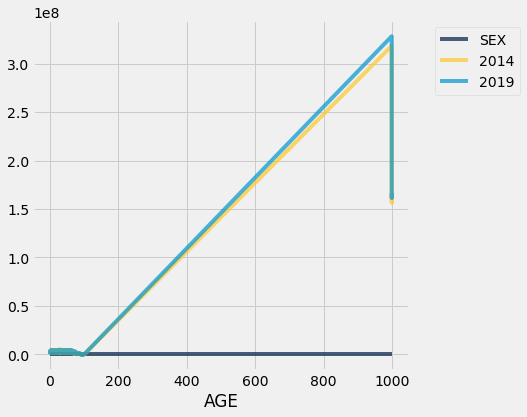

In [35]:
us_pop.plot('AGE')


In [ ]:
# in a sentence or two, describe the relationship between age 
# and the ratio of Female:Male in the 2019 population estimate



## Line Plots ##

In [39]:
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [40]:
# Remove the age totals
no_999 = us_pop.where('AGE', are.below(999)) # are not equal to (documentation)
no_999.sort('AGE', descending = True) # sort by oldest to youngest

SEX,AGE,2014,2019
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,98,59546,86150
1,98,13659,23543
2,98,45887,62607
0,97,82948,116969


In [42]:
# Remove male and female (keep only combined)
# then drop the SEX column, since it becomes redundant

everyone = no_999.where('SEX', 0).drop('SEX')
everyone

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


In [ ]:
everyone

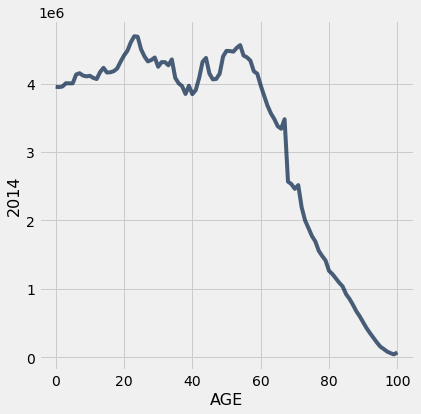

In [43]:
everyone.plot('AGE', '2014') # x axis = age, y-axis population numbers in 2019

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

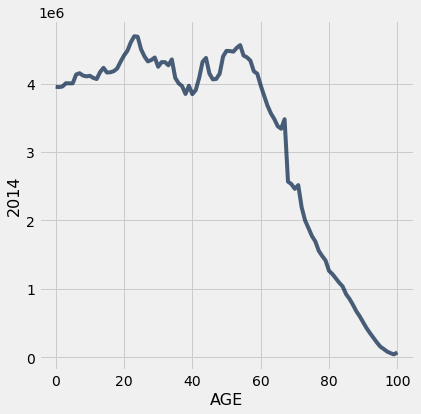

In [44]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2014')

US Population


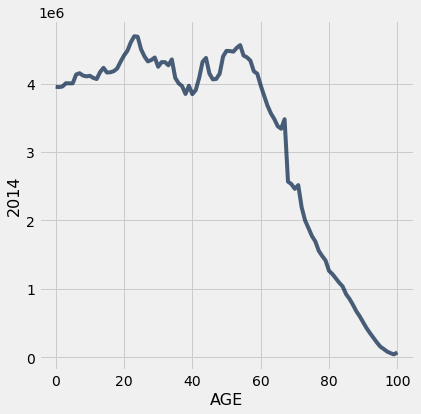

In [45]:
everyone.plot('AGE', '2014')
print('US Population')  # <--- Print out what it is

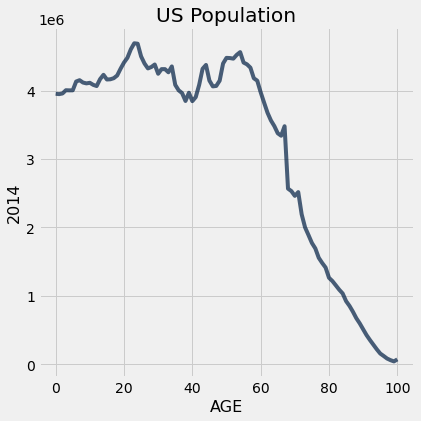

In [46]:
everyone.plot('AGE', '2014')
plots.title('US Population');    # <--- OPTIONAL; not needed for DS1

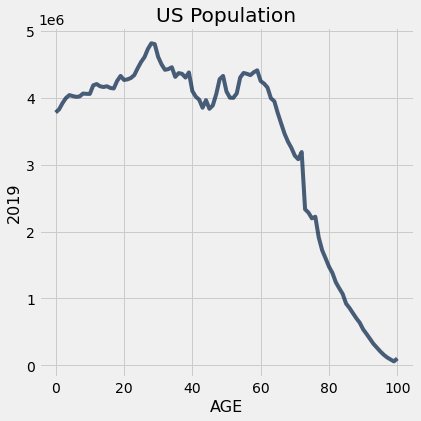

In [48]:
# can you generate a plot for 2019 now?
everyone.plot('AGE', '2019')
plots.title('US Population');




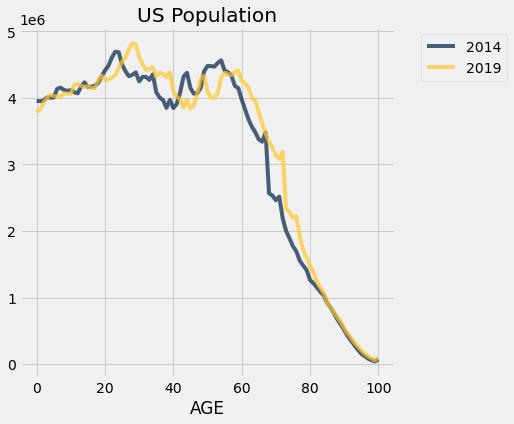

In [49]:
# what about for both years? 
# BONUS: add a descriptive title


everyone.plot('AGE') # don't specify y-axis, it will show the rest of the table,
# 2014, and 2019 overlay
plots.title('US Population');



In [50]:
help(plots)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit (object-oriented) API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API <../axes_api>` for the plotting methods on an axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

## Males and Females in 2019 ##

In [ ]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [ ]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

In [ ]:
pop_2019.plot('Age')

In [ ]:
# Calculate the percent female for each age
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

In [ ]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

In [ ]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

In [ ]:
pop_2019.plot('Age', 'Percent female')

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for DS 1

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
actors = Table.read_table('data/actors.csv')
actors

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
actors.where('Average per Movie', are.above(400))

## Bar Charts ##

In [ ]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies

In [ ]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

In [ ]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

In [ ]:
top10_adjusted.barh('Title', 'Millions')

In [ ]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted)
# work with your neighbor/table on this one!






